In [7]:
import numpy as np
import matplotlib.pylab as plt

In [1]:
with open("input/14", "r") as fp:
    data = fp.read()

In [137]:
lines = data.split("\n")[:-1]

In [119]:
# Test
lines = ["498,4 -> 498,6 -> 496,6", "503,4 -> 502,4 -> 502,9 -> 494,9"]

In [138]:
path = []
for line in lines:
    lst = []
    for pos in line.split(" -> "):
        x, y = pos.split(",")
        x, y = int(x), int(y)
        lst.append([x, y])
        
    path.append(lst)

In [139]:
X = list(map(lambda x: np.array(x).max(axis=0), path))
xM, yM = np.array(X).max(axis=0)

X = list(map(lambda x: np.array(x).min(axis=0), path))
xm, ym = np.array(X).min(axis=0)

print(xm, xM)
print(ym, yM)

490 563
14 162


## Part 1

In [123]:
M = np.zeros((1000, yM+3))
for lst in path:
    for (x0, y0), (x1, y1) in zip(lst[:-1], lst[1:]):
        if x0 == x1:
            yy = min(y0, y1)
            YY = max(y0, y1)
            M[x0, yy:YY+1] = 1
        else:
            yy = min(x0, x1)
            YY = max(x0, x1)
            M[yy:YY+1, y0] = 1


(484.0, 513.0)

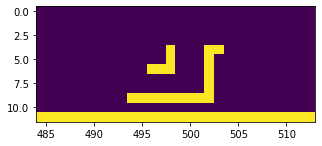

In [126]:
fig, ax = plt.subplots(figsize=(5, 10))
plt.imshow(M.T, interpolation="none")
ax.set_xlim(xm-10, xM+10)

In [127]:
for _ in range(40):
    loc_x, loc_y = 500, 0
    while True:

        if M[loc_x, loc_y + 1] == 0:
            loc_y += 1


        elif  (M[loc_x-1, loc_y+1] == 0): #(M[loc_x-1, loc_y] == 0) &
            loc_y += 1
            loc_x -= 1
        
        elif (M[loc_x+1, loc_y+1] == 0): # (M[loc_x+1, loc_y] == 0) &
            loc_y += 1
            loc_x += 1

        else:
            M[loc_x, loc_y] = 0.5
            print(loc_x, loc_y)
            break

500 8
499 8
501 8
500 7
498 8
499 7
501 7
500 6
497 8
498 7
499 6
501 6
500 5
499 5
501 5
500 4
499 4
501 4
500 3
499 3
501 3
500 2
497 5
495 8
493 10
492 10
494 10
493 9
494 8
496 8
495 7
491 10
492 9
493 8
494 7
496 7
495 6
496 5
497 4
498 3


(494.0, 503.0)

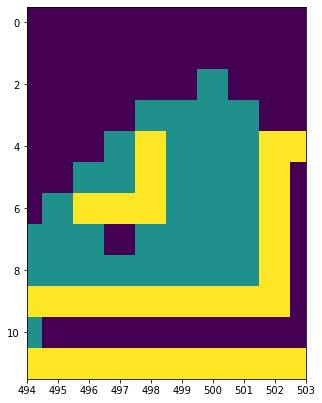

In [128]:
fig, ax = plt.subplots(figsize=(5, 10))
plt.imshow(M.T, interpolation="none")
ax.set_xlim(xm, xM)

In [115]:
np.sum(M == 0.5)

665

In [90]:
np.sum(M == 0.5)

24

## Part 2


In [140]:
M = np.zeros((1000, yM+3))
for lst in path:
    for (x0, y0), (x1, y1) in zip(lst[:-1], lst[1:]):
        if x0 == x1:
            yy = min(y0, y1)
            YY = max(y0, y1)
            M[x0, yy:YY+1] = 1
        else:
            yy = min(x0, x1)
            YY = max(x0, x1)
            M[yy:YY+1, y0] = 1

M[:, yM+2] = 1

(290.0, 663.0)

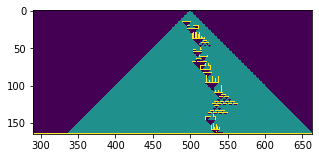

In [187]:
fig, ax = plt.subplots(figsize=(5, 10))
plt.imshow(M.T, interpolation="none")
ax.set_xlim(xm-200, xM+100)

In [186]:
for _ in range(1000):
    loc_x, loc_y = 500, 0
    if M[loc_x, loc_y] != 0:
        print('STOOOP')
        break
    while True:

        if M[loc_x, loc_y + 1] == 0:
            loc_y += 1


        elif  (M[loc_x-1, loc_y+1] == 0): #(M[loc_x-1, loc_y] == 0) &
            loc_y += 1
            loc_x -= 1
        
        elif (M[loc_x+1, loc_y+1] == 0): # (M[loc_x+1, loc_y] == 0) &
            loc_y += 1
            loc_x += 1

        else:
            M[loc_x, loc_y] = 0.5
            print(loc_x, loc_y)
            break

STOOOP


In [188]:
np.sum(M == 0.5)

25434

In [136]:
np.sum(M == 0.5)

93